# AulaP11

- Exercício: Métodos Iterativos para resolução $Ax=b$

- Método dos Mínimos Quadrados


***
## Método de Jacobi

A decomposição da matriz $A$ é feita da forma seguinte:
$$A=L+D+U=[L\backslash D\backslash U]\quad (M=D,\, N=L+U)$$ e as iterações são:
$$DX^{k+1}=b-(L+U)X^k \Longleftrightarrow X^{k+1}=D^{-1}b-D^{-1}(L+U)X^k$$



  As duas proposições seguintes aplicam-se aos métodos iterativos a estudar.
  
#### Proposição:
Se $A$ tem diagonal estritamente dominante, por linhas ou por colunas, então o
método converge.


***
### Uma implementação possível 

In [9]:
import numpy as np

class Jacobi:
    def __init__(self,A,b,x0):
        self.dim=len(b)
        self.A=A
        self.D=np.diag(A)
        self.b=b
        self.x0=x0
        self.x=np.zeros(self.dim)

    def IterativeSolver(self, MaxIter=100, Eps=1.e-10,  Error=1.0): 
        #assert self.isConvergent() == True, 'Not Diagonal Dominant'
        x0=self.x0 
        x=np.zeros(self.dim)
        D=self.D 
        # np.diag() extrai diagonal ou constroi matriz diagonal # 
        Dinv=1./D
        #LpU=self.A-np.diag(D)
        
        for i in range(0, MaxIter):
            for m in range(0,self.dim):
                vm=0.0
                for j in range(0,self.dim):
                    if m != j:
                        vm+=self.A[m,j]*x0[j]
                
                x[m]=Dinv[m]*(self.b[m]-vm)
            
            #x=Dinv*(self.b - np.dot((self.A-np.diag(D)),x0))
            Error=np.sqrt(np.sum((x-x0)**2))
            if Error< Eps:
                break
            
            x0[:]=x[:]
            
        return x, Error, i
            
    def isDiagRowDominant(self):
        bool_val=False
        Aux=self.A-np.diag(self.D)
        for k in range(0,self.dim):
            if (np.fabs(self.D[k]) > np.sum(np.fabs(Aux[k,:]))) :
                bool_val=True
            else: 
                bool_val=False
                break
        
        return bool_val
    
    def isDiagColumnDominant(self):
        bool_val=False
        Aux=self.A-np.diag(self.D)
        for k in range(0,self.dim):
            if (np.fabs(self.D[k]) > np.sum(np.fabs(Aux[:,k])) ):
                bool_val=True
            else: 
                bool_val=False
                break
        
        return bool_val
    
    def isConvergent(self):
        return  self.isDiagRowDominant() or self.isDiagColumnDominant() 

        
        

*** 
### Exercício:

Verifique se o método de Jacobi é convergente para a resolução do sistema:

$$
 \begin{bmatrix}
4&1&2&1/2\\
1&3&0&-1\\
1/2 & 1/2&3&1\\
1&-1&1& 4
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
x_4
\end{bmatrix}=
\begin{bmatrix}
3\\
2\\
1\\
3
\end{bmatrix}
$$

In [10]:
A=np.array([[4.0,1.0,2.0,0.5],[1.0,3.0,0.0,-1.0],[0.5,0.5,3.0,1.0],[1.0,-1.0,1.0,4.0]])

b=np.array([3.,2.,1.,3.])


J=Jacobi(A,b,np.ones(len(b))) # Testar diferentes X0

print('is Convergent?', J.isConvergent())

J.x, Error, Iterations = J.IterativeSolver( )

print('Solution=',J.x)
print('Error=',Error)

print('Converges in', Iterations, 'Iterations')

#Test with numpy linalg functions
print('Solution=',np.linalg.solve(A,b))

is Convergent? True
Solution= [ 0.53465347  0.77227723 -0.16831683  0.85148515]
Error= 9.05839725503e-11
Converges in 39 Iterations
Solution= [ 0.53465347  0.77227723 -0.16831683  0.85148515]


***
***

# Métodos dos Mínimos Quadrados

### Problema (Caso Discreto) :
Dados $n$ pares ordenados $(x_i,y_i),\, (i=1,\dots,n,\, n\geq2)$ e com
pelo menos duas abcissas $x_i$ distintas, pretende-se construir uma
função de ajustamento $g(x)$ que aproxime os valores tabelados: (ver exemplo numérico).


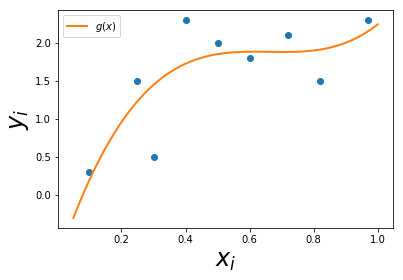

In [11]:
import numpy as np

# Valores tabelados
x = np.array([0.1,0.25,0.3,0.4,0.5,0.6,0.72,0.82,0.97])
y = np.array([0.3, 1.5, 0.5, 2.3, 2.0, 1.8,2.1,1.5,2.3])
# Ajustamento por polinómio de grau 3
z = np.polyfit(x, y, 3) #https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
p = np.poly1d(z)

# Apresentação dos gráficos
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=24)
xp = np.linspace(0.05, 1, 100)
plt.plot(x, y, 'o')
plt.plot(xp, p(xp),'-', lw=2,label='$g(x)$')
plt.xlabel(r'$x_i$')
plt.ylabel(r'$y_i$')
plt.legend(loc='best')
plt.show()
plt.clf()

#### Desvios:
- Para uma função de ajustamento $g(x)$ aos pontos tabelados $(x_i,y_i)$, define-se o desvio $d_i=y_i-g(x_i)$ $(i=1,\dots,n)$.


#### Método dos Mínimos Quadrados (MMQ): 
- Consiste no processo que permite determinar o minimizante da quantidade seguinte: $$R=\sum_{i=1}^n d_i^2= \sum_{i=1}^n (y_i-g(x_i))^2.$$ Esta quantidade $R$ designa-se por **Erro Total** do ajustamento pelo MMQ.



#### Comparação de funções de ajustamento:
- Dadas duas funções $f$ e $g$ de ajustamento aos valores tabelados $(x_i,y_i)$, diz-se que $f$ é melhor do que $g$, segundo o critério dos mínimos quadrados, se $$\sum_{i=1}^n (y_i-f(x_i))^2<\sum_{i=1}^n (y_i-g(x_i))^2.$$


***

### Regressão Linear por função de ajustamento genérica

Considere-se $(x_i,y_i)$ $(i=1,\dots,n)$   e $f(x_i)=y_i$ a função
tabelada, a qual se pretende ajustar
por meio de uma função da forma
<br>

$$g(x)=a_0g_0(x)+a_1g_1(x)+\dots+a_mg_m(x)$$
<br>
com $m<n\in\mathbb{N}$
e onde $g_k$, $k=0,\dots,m$ são funções elementares  dadas.

Para além disso, assuma-se que as funções $g_k$ são linearmente
independentes (LI), i.e., 

<br>
$$a_0 g_0(x_i)+\dots+a_m g_m(x_i)=0\quad \forall x_i\,
 \Leftrightarrow a_0=\dots=a_m=0.$$
<br>

O MMQ consiste no processo de cálculo do ponto $(a_0,\dots,a_m)$ onde
é atingido o mínimo de
$$R=\sum_{i=1}^n\left(a_0g_0(x_i)+a_1g_1(x_i)+\cdots+a_mg_m(x_i)-y_i\right)^2$$


Resolvendo o sistema anterior encontram-se os coeficientes
$(a_0,\dots,a_m)$ da função de ajustamento  $g(x)$.



#### Proposição:
- $R=R(a_0,\cdots,a_m)$ assume um mínimo no ponto em que as $(m+1)$ derivadas parciais (em relação a $a_k$) são simultaneamente nulas.

Tem-se para $k=0,\cdots,m$:
\begin{eqnarray}
\frac{\partial R}{\partial a_k}=2\sum_{i=1}^n\left(\left(g(x_i)-y_i\right)\frac{\partial g(x_i)}{\partial a_k}\right)=0\Leftrightarrow\\
2\sum_{i=1}^n\left(\left(a_0g_0(x_i)+\cdots+ a_mg_m(x_i)-y_i\right)\frac{\partial g(x_i)}{\partial a_k}\right)=0\Leftrightarrow\\
\sum_{i=1}^n\left(\left(a_0g_0(x_i)+\cdots +a_mg_m(x_i)-y_i\right)g_k(x_i)\right)=0\Leftrightarrow\\
\sum_{i=1}^n\left(\left(a_0g_0(x_i)+\cdots +a_mg_m(x_i)\right)g_k(x_i)\right)=\sum_{i=0}^ny_ig_k(x_i)
\Leftrightarrow\\
a_0\sum_{i=1}^ng_0(x_i)g_k(x_i)+\cdots +a_m\sum_{i=1}^ng_m(x_i)g_k(x_i)=\sum_{i=1}^ny_ig_k(x_i).
\end{eqnarray}
Donde resulta o sistema de $m+1$ equações e $m+1$ incógnitas, ($a_0,\cdots,a_m)$ seguinte:

\begin{multline}
\left[
\begin{array}{llll}
\displaystyle\sum_{i=1}^ng_0^2(x_i)&\displaystyle\sum_{i=1}^ng_0(x_i)g_1(x_i)&\cdots&\displaystyle\sum_{i=1}^ng_0(x_i)g_m(x_i)\\
\displaystyle\sum_{i=1}^ng_1(x_i)g_0(x_i)&\displaystyle\sum_{i=1}^ng_1^2(x_i)&\cdots&\displaystyle\sum_{i=1}^ng_1(x_i)g_m(x_i)\\
\vdots&\vdots&\ddots&\vdots\\
\displaystyle\sum_{i=1}^ng_m(x_i)g_0(x_i)&\displaystyle\sum_{i=1}^ng_m(x_i)g_1(x_i)&\cdots&\displaystyle\sum_{i=1}^ng^2_m(x_i)
\end{array}
\right]
\left[
\begin{array}{c}
\vphantom{\sum_{i=1}^ng_0(x_i)}a_0\\
\vphantom{\sum_{i=1}^ng_0(x_i)}a_1\\
\vdots\\
\vdots\\
\vdots\\
\vphantom{\sum_{i=1}^ng_0(x_i)}a_{m-1}\\
\vphantom{\sum_{i=1}^ng_0(x_i)}a_m
\end{array}
\right]
=\left[
\begin{array}{c}
\displaystyle\sum_{i=1}^ng_0(x_i)y_i\\
\displaystyle\sum_{i=1}^ng_1(x_i)y_i\\
\vdots\\
\displaystyle\sum_{i=1}^ng_m(x_i)y_i
\end{array}
\right]
\end{multline}

***
### Exemplo: Regressão Linear por uma Recta

Das equações anteriores resulta o sistema normal do MMQ, o qual  tem
duas equações e duas  incógnitas $(a_0,a_1)$,  é
possível e determinado e  que se pode escrever da forma seguinte:
<br>

\begin{equation*}
\left[
\begin{array}{cc}
\sum_{i=1}^n1&\displaystyle\sum_{i=1}^nx_i\\
\sum_{i=1}^nx_i&\sum_{i=1}^nx_i^2
\end{array}
\right]
\left[
\begin{array}{c}
\vphantom{\sum_{i=1}^n1} a_0\\
\vphantom{\sum_{i=1}^n1} a_1
\end{array}
\right]
=\left[
\begin{array}{c}
\sum_{i=1}^ny_i\\
\displaystyle\sum_{i=1}^ny_ix_i\\
\end{array}
\right]
\end{equation*}
<br>

Resolvendo o sistema anterior encontra-se a função de ajustamento linear
$g$. De facto, a  solução única deste sistema é  dada por:

<br>
\begin{equation*}
a_0=\frac{\displaystyle \sum_{i=1}^nx_i^2\sum_{i=1}^ny_i-
  \sum_{i=1}^ny_ix_i\sum_{i=1}^nx_i }{\displaystyle n\sum_{i=1}^nx_i^2-\left(\sum_{i=1}^nx_i\right)^2},
\end{equation*}
<br>

\begin{equation*}
a_1=\frac{\displaystyle
  n\sum_{i=1}^ny_ix_i-\sum_{i=1}^nx_i\sum_{i=1}^ny_i}{\displaystyle n\sum_{i=1}^nx_i^2-\left(\sum_{i=1}^nx_i\right)^2}.
\end{equation*}

### Exercício:

Calcule as rectas de ajustamento (por meio do MMQ) aos valores apresentados nas tabelas seguintes: 

1.

$x$ | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10|
--- |---|---|---|---|---|---|---|---|---|---|
$y$ |1.3 | 3.5 | 4.2 | 5.0 | 7.0 | 8.8 | 10.1 | 12.5 | 13.0 | 15.6 |

2.

$x$ | 0.013 | 0.024 | 0.038 | 0.048 | 0.67 | 
--- |------|------|------|---|---|---|---|
$y$ |0.11 | 0.23 | 0.33 | 0.45 | 0.58 |

a0= -0.36
a1= 1.53818181818


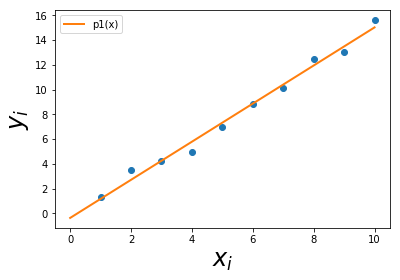

In [39]:
import numpy as np

# Table Values
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([1.3, 3.5, 4.2, 5.0, 7.0, 8.8,10.1,12.5,13.0,15.6])

#  Coefficients
d=len(x)*np.sum(x**2)-(np.sum(x))**2
a0=(np.sum(x**2)*np.sum(y)-np.sum(x*y)*np.sum(x))/d
a1=(len(x)*np.sum(x*y)-np.sum(x)*np.sum(y))/d
print('a0=',a0)
print('a1=',a1)

# graph
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=24)
xp = np.linspace(0, 10, 100) # 2 pontos são suficientes: Recta
plt.plot(x, y, 'o')
plt.plot(xp, a0+a1*xp,'-', lw=2,label='p1(x)')
plt.xlabel(r'$x_i$')
plt.ylabel(r'$y_i$')
plt.legend(loc='best')
plt.show()

***
### Exemplo: ajustamento linear por meio de uma parábola

Um ajustamento por meio de uma parábola $g(x)=a_0+a_1x+a_2x^2$ a um
conjunto de dados tabelados $(x_i,y_i)\, (i=1,\dots,n)$, resulta no
sistema que apresentamos simbolicamente de seguida:
\begin{equation*}
\left[
\begin{array}{lll}
\sum 1&\sum x&\sum x^2\\
\sum x&\sum x^2&\sum x^3\\
\sum x^2&\sum x^3&\sum x^4
\end{array}
\right]
\left[
\begin{array}{c}
\vphantom{\sum 1}a_0\\
\vphantom{\sum 1}a_1\\
\vphantom{\sum 1}a_2
\end{array}
\right]
=
\left[
\begin{array}{l}
\sum y\\
\sum xy\\
\sum x^2y
\end{array}
\right]
\end{equation*}

### Exercício (caso genérico):

- Considere a tabela seguinte:

|$x$|$0$|$2$|$4$|$6$|$8$|
|---|---|---|---|---|---|
|$y$|$0$|$50$|$-20$|$80$|$700$|

Determine um ajustamento por uma função do tipo $g(x)=a_0e^x+a_1x+a_2\sin(x)$.
-  Substitua na implementação seguinte, a função **linalg.solve** por uma implementação do método de Crout.



[[  9.05190187e+06   2.65014074e+04   2.80190994e+03]
 [  2.65014074e+04   1.20000000e+02   5.02975786e+00]
 [  2.80190994e+03   5.02975786e+00   2.45647459e+00]]
[  2.11822238e+06   6.10000000e+03   7.30798454e+02]
Os coeficientes a0, a1 e a2 sao 0.215 , 1.344 e 49.957


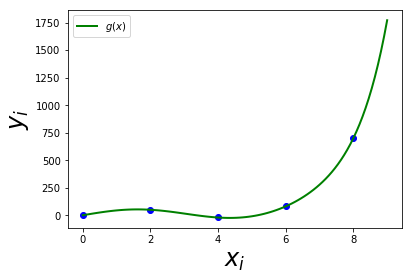

In [12]:
import numpy as np

# Valores tabelados
x = np.array([0,2,4,6,8])
y = np.array([0, 50, -20,80,700])

# Cálculos auxiliares (avaliação das funções base)
g=[np.exp(x), x, np.sin(x)] 
dim=len(g)

#Construção do sistema normal
#Matriz A
A=np.zeros((dim,dim))
for i in range(0,dim):
    for j in range(i,dim):
        A[i,j]=np.inner(g[i],g[j]) #A00=np.inner(g[0],g[0]) #A12=np.inner(g0,g1) 
        if j>i:
            A[j,i]=A[i,j]

# Vector independente
b=np.zeros(dim)
for i in range(0,dim):
    b[i]=np.inner(g[i],y)

#A=np.array([[A00,A01,A03],[A10,A11,A12],[A20,A21,A22]])
print(A)
print(b)

### TRABALHO: SUBSTITUIR np.linalg.solve por um método estudado
X_a=np.linalg.solve(A,b)


print(r"Os coeficientes a0, a1 e a2 sao \
%.3f , %.3f e %.3f"  % (X_a[0],X_a[1],X_a[2]))


# Apresentação dos gráficos
import matplotlib.pyplot as plt

plt.rc('axes', labelsize=24)
plt.plot(x, y, 'o',color='b')

xis=np.linspace(0,9,100)

def g(xis):
 aux=X_a[0]*np.exp(xis)+X_a[1]*xis+X_a[2]*np.sin(xis)
 return aux

plt.plot(xis,g(xis),'-',color='g',lw=2,label='$g(x)$')
plt.xlabel('$x_i$')
plt.ylabel('$y_i$')
plt.legend(loc='best')
plt.show()

### Exercício

- Considere a tabela de valores seguinte:
 
| x|  $0$|$1$|$2$|$3$ |$5$|
|-----|---|---|---|----|---|---|
| f(x)|$0$|$1$|$-1$|$2$|$3$|

Utilize o método dos mínimos quadrados para escrever o sistema
normal que permite determinar uma função de ajustamento da forma
  $g(x)=a_0+a_1x+a_2x^2.$


### Exercício

- Considere a tabela de valores seguinte:

|x|1.2|3.5|4.1|6.2|7.6|
|---|---|---|---|---|---|
|y|10|220|-150|80|1200|

Utilize o método dos mínimos quadrados para calcular um ajustamentos da forma:

$$g(x)=a_0g_0(x)+a_1g_1(x)+a_2g_2(x) $$

para os seguintes conjuntos de funções $G=\{g_0,g_1,g_2\}$:
 1. $\{x,\cos x,\sin x\}$
 2. $\{x^2,\cos x,\sin x\}$
 3. $\{x^5,\cos x,\sin x\}$

- Compare os erros para cada ajustamento e indique o melhor. 

***
***
### Problema (Caso Contínuo):

Considerem-se $y=f(x)$ $(x\in[a,b])$ a função que se pretende ajustar.
Pretende-se aproximar $f(x)$ construindo uma função

$$g(x)=a_0g_0(x)+a_1g_1(x)+\dots+a_mg_m(x)$$
<br>
com $m<n\in\mathbb{N}$
e onde $g_k$, $k=0,\dots,m$ são funções elementares linearmente independentes dadas.

O MMQ consiste no método para determinar $a_i$ de forma a minimizar
quantidade $$R=\int_a^b(f(x)-g(x))^2\, {\rm d}x.$$


Analogamente ao caso discreto o processo de minimização consiste em resolver o sistema:
\begin{multline}
\left[
\begin{array}{llll}
\displaystyle\int_{a}^b g_0^2(x) \, {\rm d}x&\displaystyle\int_{a}^b g_0(x)g_1(x) \, {\rm d}x&\cdots&\displaystyle\int_{a}^b g_0(x)g_m(x)\, {\rm d}x\\
\displaystyle\int_{a}^b g_1(x)g_0(x) \, {\rm d}x&\displaystyle\int_{a}^b g_1^2(x) \, {\rm d}x&\cdots&\displaystyle\int_{a}^b g_1(x)g_m(x) dx\\
\vdots&\vdots&\ddots&\vdots\\
\displaystyle\int_{a}^b g_m(x)g_0(x) \, {\rm d}x&\displaystyle\int_{a}^b g_m(x)g_1(x)\, {\rm d}x&\cdots&\displaystyle\int_{a}^b g^2_m(x) \, {\rm d}x
\end{array}
\right]
\left[
\begin{array}{c}
\vphantom{\sum_{i=1}^ng_0(x_i)}a_0\\
\vphantom{\sum_{i=1}^ng_0(x_i)}a_1\\
\vdots\\
\vdots\\
\vdots\\
\vphantom{\sum_{i=1}^ng_0(x_i)}a_{m-1}\\
\vphantom{\sum_{i=1}^ng_0(x_i)}a_m
\end{array}
\right]
=\left[
\begin{array}{c}
\displaystyle\int_{a}^b g_0(x)f(x)\, {\rm d}x\\
\displaystyle\int_{a}^b g_1(x)f(x) \, {\rm d}x\\
\vdots\\
\displaystyle\int_{a}^b g_m(x)f(x) \, {\rm d}x
\end{array}
\right]
\end{multline}

***
### Exemplo: Regressão Linear por uma Recta $(g(x)=a_0+a_1 x )$


Das equações anteriores resulta o sistema normal do MMQ, o qual  tem
duas equações e duas  incógnitas $(a_0,a_1)$,  é
possível e determinado e  que se pode escrever da forma seguinte:

\begin{equation*}
\left[
\begin{array}{cc}
\int_{a}^b1\, {\rm d}x&\displaystyle\int_{a}^bx\, {\rm d}x\\
\int_{a}^bx\, {\rm d}x&\int_{a}^bx^2\, {\rm d}x
\end{array}
\right]
\left[
\begin{array}{c}
\vphantom{\sum_{a}^b1} a_0\\
\vphantom{\int_{a}^b1} a_1
\end{array}
\right]
=\left[
\begin{array}{c}
\int_{a}^bf(x)\, {\rm d}x\\
\displaystyle\int_{b}^bf(x)x\, {\rm d}x\\
\end{array}
\right]
\end{equation*}


Resolvendo o sistema anterior ficam determinados os coeficientes $a_0$ e
$a_1$ que, neste caso, definem a recta de ajustamento $g(x)$.

### Exercício:

Sendo $f(x)=\sin(x)$, pretende-se aproximar esta função no intervalo
$[0,1]$, por uma recta $g(x)=a_0+a_1x$. 

1. Calcule o erro total associado.
2. Modifique o código seguinte de forma a que as funções de cálculo simbólico do módulo **sympy** sejam substituidas  por um esquema de quadratura estudado:

[[ 1.          0.5       ]
 [ 0.5         0.33333333]]
[ 0.45969769  0.30116868]
Os coeficientes: a0=0.032  e  a1=0.856 
O Erro Total é R= 0.00031545


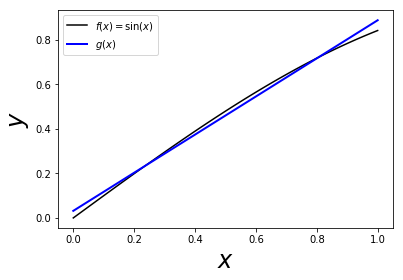

In [50]:
import numpy as np
from math import  sin
from sympy import * ## Remover este módulo


x=Symbol('x')

#Construção do sistema normal
#Matriz A
A11=integrate(1,[x,0,1]) # implementar um esquema de quadratura para substituir a função integrate
A12=integrate(x,[x,0,1])

A21=A12
A22=integrate(x**2,[x,0,1])


b11=integrate(sin(x),[x,0,1])
b21=integrate(sin(x)*x,[x,0,1])

A=np.array([[A11,A12],[A21,A22]])

# Como foi usado cálculo simbólico é necessário
# avaliar A como um matriz de floats (vírgula flutuante)

A=A.astype(float) 
print(A)

b=np.array([b11,b21])
b=b.astype(float)
print(b)

X_a=np.linalg.solve(A,b)

print(r"Os coeficientes: a0=%.3f  e  a1=%.3f "\
  % (X_a[0],X_a[1]))

R=integrate((sin(x)-X_a[0]-X_a[1]*x)**2,[x,0,1])
print(r'O Erro Total é R=', round(float(R),8))

# Apresentação dos gráficos
import matplotlib.pyplot as plt

plt.rc('axes', labelsize=24)

x=np.linspace(0,1,100)
y=np.sin(x)
xis=np.linspace(0,1,100)
def g(xis):
 return X_a[0]+X_a[1]*xis

plt.plot(x, y, '-',color='k',label='$f(x)=\sin(x)$')
plt.plot(xis,g(xis),'-',color='b',lw=2,label='$g(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(loc='best')
plt.show()
